In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

# Preparing the Data and Training Models

In [64]:
from income_prediction import get_data, preprocess_y, build_X_pipeline_partial

X_train, X_test, y_train, y_test = get_data(columns_to_drop=['marital-status', 'relationship', 'race', 
                                                             'sex', 'native-country'])
y_train_prepared = preprocess_y(y_train)
y_test_prepared = preprocess_y(y_test)
X_pipeline = build_X_pipeline_partial()
X_train_prepared = X_pipeline.fit_transform(X_train, y_train_prepared)
X_test_prepared = X_pipeline.transform(X_test)

X_train_prepared.shape, y_train_prepared.shape, X_test_prepared.shape, y_test_prepared.shape

((36631, 27), (36631,), (12211, 27), (12211,))

In [65]:
# Let's import everything we will use
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [66]:
# This is our selected model
xgb = XGBClassifier(n_jobs=-1, random_state=0, n_estimators=239, learning_rate=.1, max_depth=10, subsample=.7, 
                    colsample_bytree=.3)

xgb.fit(X_train_prepared, y_train_prepared)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=239, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.7, tree_method=None,
              validate_parameters=False, verbosity=None)

In [67]:
# This is the model with all the features, including the ones we removed for eethics reasons
from income_prediction import build_X_pipeline_full, mean_value_score

xgb_full = XGBClassifier(n_jobs=-1, random_state=0)

X_train_full, X_test_full, _, _ = get_data(columns_to_drop=None)
full_dataset_pipeline = build_X_pipeline_full(xgb_full)

custom_scorer = make_scorer(mean_value_score)

params = {
        'TargetEncoder__reg_weight': [20],
        'predictor__n_estimators': [156],
        'predictor__learning_rate': [.1],
        'predictor__max_depth': [None],
        'predictor__subsample': [1],
        'predictor__colsample_bytree': [1]
        }

grid_full_ds = GridSearchCV(full_dataset_pipeline, params, n_jobs=-1, cv=5, return_train_score=True, 
                            scoring=custom_scorer)
grid_full_ds.fit(X_train_full, y_train_prepared)

print('Best Params', grid_full_ds.best_params_)
print('Best score %.3f' % grid_full_ds.best_score_)

Best Params {'TargetEncoder__reg_weight': 20, 'predictor__colsample_bytree': 1, 'predictor__learning_rate': 0.1, 'predictor__max_depth': None, 'predictor__n_estimators': 156, 'predictor__subsample': 1}
Best score 17.951


In [69]:
# And this is the model with the removed features, but optimized on accuracy, for comparison purposes.
params = {
        'n_estimators': [149],
        'learning_rate': [.1],
        'max_depth': [10],
        'subsample': [.7],
        'colsample_bytree': [.3]
        }
xgb_accur = XGBClassifier(n_jobs=-1, random_state=0)

grid_xgb_accur = GridSearchCV(xgb_accur, params, n_jobs=-1, cv=5, return_train_score=True)
grid_xgb_accur.fit(X_train_prepared, y_train_prepared)

print('Best Params', grid_xgb_accur.best_params_)
print('Best score %.4f' % grid_xgb_accur.best_score_)

Best Params {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 149, 'subsample': 0.7}
Best score 0.8505


# Matplotlib Basics
Matplot lib is a useful plotting library. To learn more, check these [Matplotlib tutorials](https://matplotlib.org/3.1.1/tutorials/). The examples below are based on these tutorials.

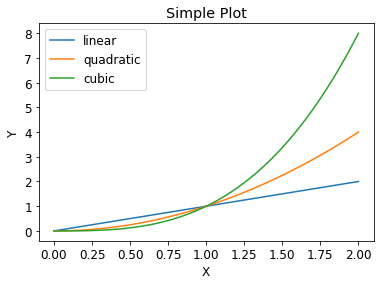

In [76]:
# A simple plot.
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Simple Plot")
plt.legend()

plt.show()

You can learn about the elements and terminology of matplotlib plot from [this figure](https://matplotlib.org/3.1.1/_images/anatomy.png).

In [77]:
# This code centers matplotlib chart in this Jupyter notebook
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

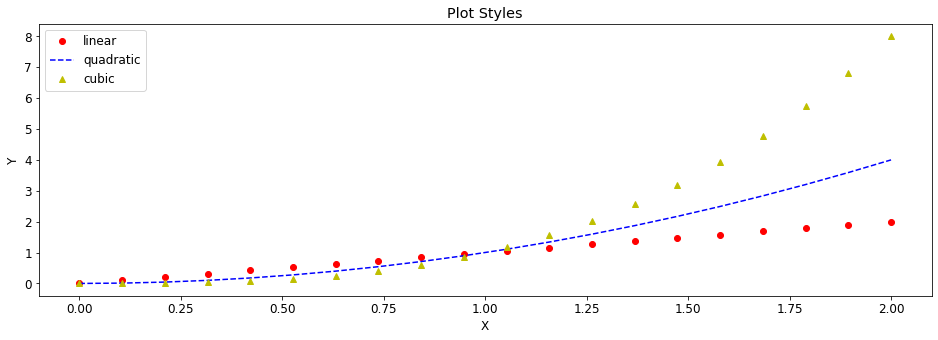

In [82]:
# Using format strings to specify plot style
x = np.linspace(0, 2, 20)

plt.figure(figsize=(16,5))
plt.plot(x, x, 'ro', label='linear')
plt.plot(x, x**2, 'b--', label='quadratic')
plt.plot(x, x**3, 'y^', label='cubic')

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Plot Styles")
plt.legend()

plt.show()

Learn more about plotting options [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

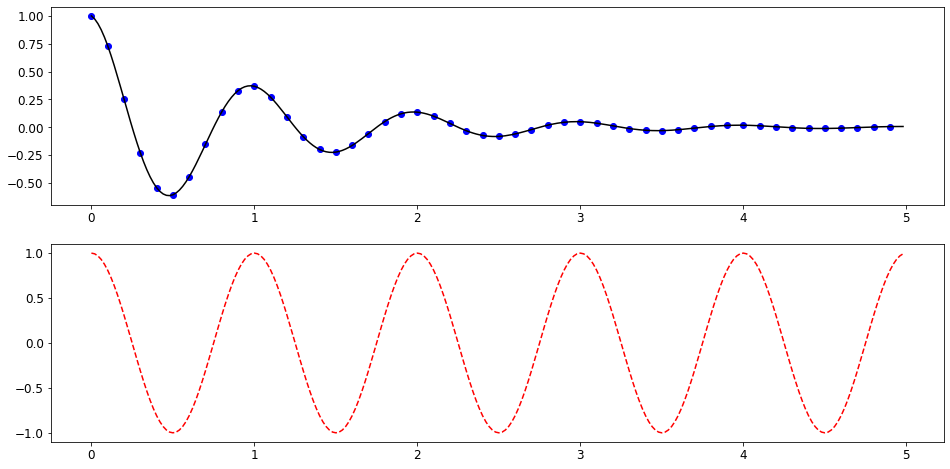

In [83]:
# Using subplots
def f(t):
    return np.exp(-t) * np.cos(2 * np.pi * t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(figsize=(16,8))
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2 * np.pi * t2), 'r--')
plt.show()

# Model Evaluation and Interpretation
## Model performance

In [84]:
# How is our selected model doing on the test set?
y_pred = xgb.predict(X_test_prepared)
test_set_performance = mean_value_score(y_test_prepared, y_pred)
print('The mean gained value per potential customer is $%.2f.' % test_set_performance)

The mean gained value per potential customer is $14.84.


In [85]:
# How does the model with the full dataset compare?
y_pred = grid_full_ds.predict(X_test_full)
full_set_performance = mean_value_score(y_test_prepared, y_pred)
print('The mean gained value per potential customer with a full dataset is $%.2f.' % full_set_performance)

The mean gained value per potential customer with a full dataset is $18.14.


In [86]:
max_performance = mean_value_score(y_test_prepared, y_test_prepared)
print('The mean gained value per potential customer with a perfect model would be $%.2f.' % max_performance)

The mean gained value per potential customer with a perfect model would be $29.35.


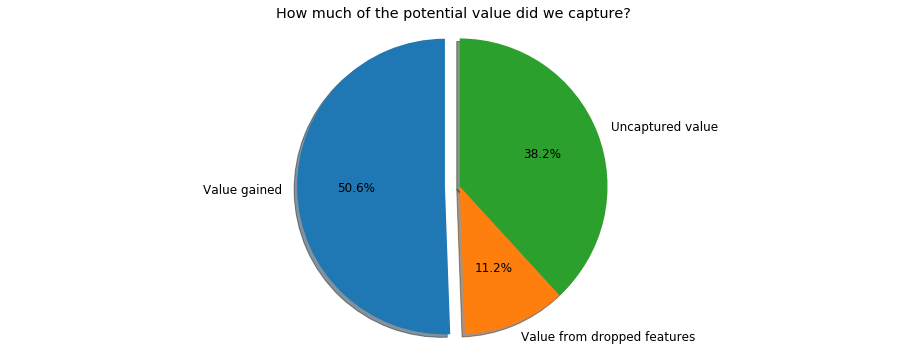

In [89]:
labels = 'Value gained', 'Value from dropped features', 'Uncaptured value'
values = [test_set_performance, full_set_performance - test_set_performance, max_performance - full_set_performance]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Value Gained')

plt.figure(figsize=(16,6))
plt.title('How much of the potential value did we capture?')
plt.pie(values, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Feature importance

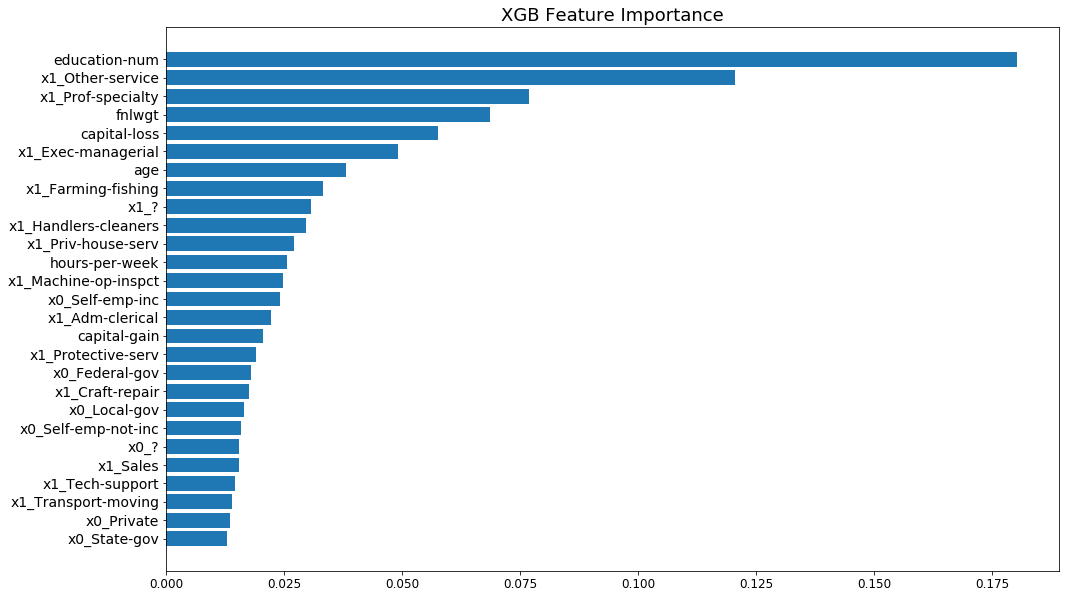

In [90]:
one_hot_encoder = (X_pipeline.named_steps['ColumnTransformer'].named_transformers_['One Hot Encoder'])
cat_features = one_hot_encoder.get_feature_names()
num_features = ['age', 'capital-gain', 'capital-loss', 'education-num', 'fnlwgt', 'hours-per-week']
feature_names = np.r_[num_features, cat_features]

sorted_idx = xgb.feature_importances_.argsort()

f = plt.figure(figsize=(16,10))
plt.barh(feature_names[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.yticks(fontsize=14)
plt.title("XGB Feature Importance", fontsize=18)

plt.show()

There's quite a bit going on in the short code above. Let's unpack it.

In [91]:
# Getting feature importances from tree based predictors is quite straightforward
xgb.feature_importances_

array([0.03802564, 0.02047171, 0.0574949 , 0.18014248, 0.06856727,
       0.02544442, 0.01541875, 0.01790855, 0.01649681, 0.01351896,
       0.02409685, 0.01589286, 0.0127305 , 0.03069923, 0.02209741,
       0.0173899 , 0.04911822, 0.03313981, 0.02965366, 0.02475443,
       0.12041036, 0.02703406, 0.07679516, 0.01899849, 0.01530444,
       0.01454868, 0.01384644], dtype=float32)

In [92]:
# But how do we get the features? We can't just use the column names from our training set.
X_train.head()

,age,capital-gain,capital-loss,education,education-num,fnlwgt,hours-per-week,occupation,workclass
35805,42,0,0,HS-grad,9,197344,40,Machine-op-inspct,State-gov
3413,34,7298,0,Bachelors,13,340940,60,Sales,Private
20050,32,0,0,Some-college,10,177566,50,Prof-specialty,Local-gov
26603,36,5178,0,HS-grad,9,226013,40,Machine-op-inspct,Private
36726,29,0,0,Bachelors,13,114158,40,Tech-support,Private


In [93]:
# And the prepared dataset is an array with no column names.
X_train_prepared[0].toarray()

array([[ 0.24480906,  0.07519069, -0.42007212, -0.14576921, -0.21642339,
        -0.03431036,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [94]:
# This is why we have to get the names of the encoded categorical features from the one hot encoder
print(X_pipeline, '\n')
one_hot_encoder = (X_pipeline.named_steps['ColumnTransformer'].named_transformers_['One Hot Encoder'])
one_hot_encoder.get_feature_names()

Pipeline(memory=None,
         steps=[('CategoryReviser',
                 CategoryReviser(cat_change_rules={'occupation': {'Armed-Forces': 'Prof-specialty'},
                                                   'workclass': {'Never-worked': '?',
                                                                 'Without-pay': '?'}})),
                ('ColumnTransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('Scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
          

array(['x0_?', 'x0_Federal-gov', 'x0_Local-gov', 'x0_Private',
       'x0_Self-emp-inc', 'x0_Self-emp-not-inc', 'x0_State-gov', 'x1_?',
       'x1_Adm-clerical', 'x1_Craft-repair', 'x1_Exec-managerial',
       'x1_Farming-fishing', 'x1_Handlers-cleaners',
       'x1_Machine-op-inspct', 'x1_Other-service', 'x1_Priv-house-serv',
       'x1_Prof-specialty', 'x1_Protective-serv', 'x1_Sales',
       'x1_Tech-support', 'x1_Transport-moving'], dtype=object)

In [95]:
# And what's the deal with the sorted indices? We can use order numpy array useing arrays of indices
a = np.array([10, 20, 30])
a[[2, 0, 1]]

array([30, 10, 20])

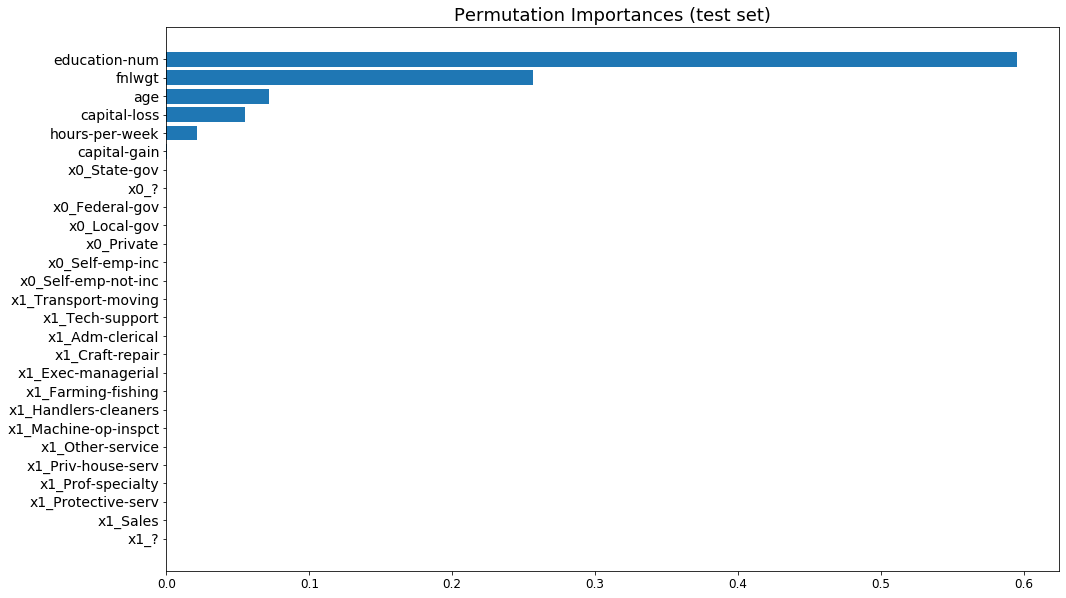

In [96]:
# And now let's see the permutaiton importances
from sklearn.inspection import permutation_importance

perm_imp = permutation_importance(xgb, X_test_prepared.toarray(), y_test_prepared, n_repeats=10, random_state=0, n_jobs=-1,
                            scoring=custom_scorer)
norm_perm_imp = perm_imp.importances_mean / perm_imp.importances_mean.sum()
perm_imp_sorted_idx = perm_imp.importances_mean.argsort()

plt.figure(figsize=(16,10))
plt.barh(feature_names[perm_imp_sorted_idx], norm_perm_imp[perm_imp_sorted_idx])
plt.yticks(fontsize=14)
plt.title("Permutation Importances (test set)", fontsize=18)
plt.show()

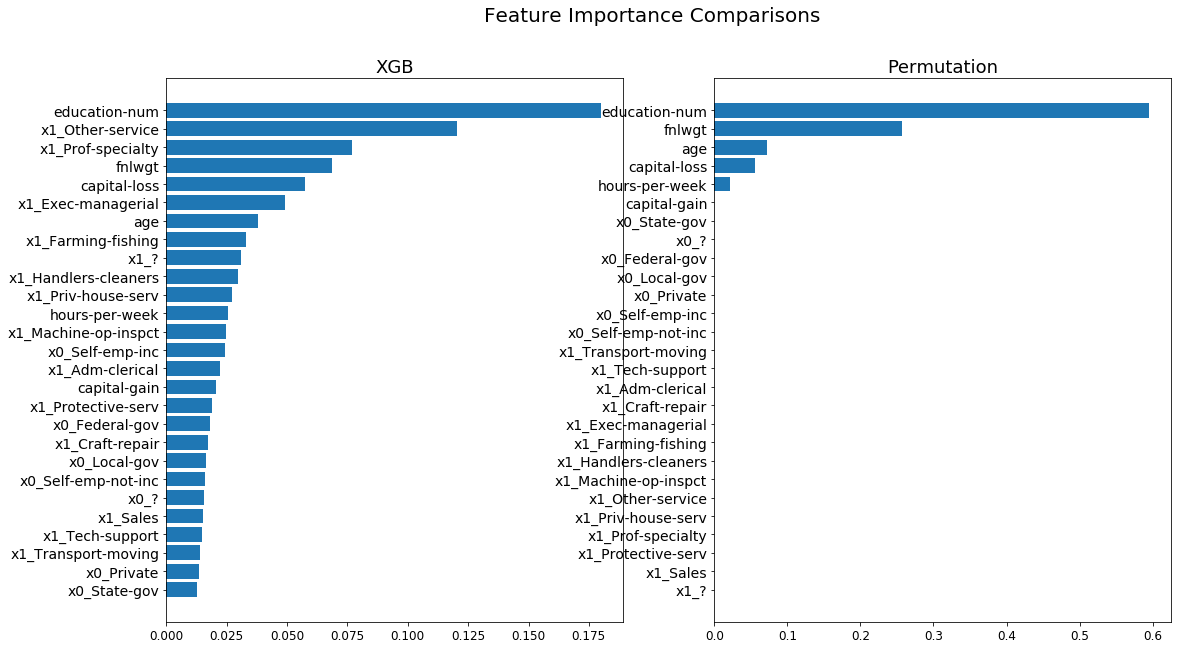

In [97]:
# Let's compare these side by side. How can we explain the differences between them?
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Feature Importance Comparisons', fontsize=20)
ax1.barh(feature_names[sorted_idx], xgb.feature_importances_[sorted_idx])
ax1.set_title("XGB", fontsize=18)
ax1.set_yticklabels(feature_names[sorted_idx], fontsize=14)

ax2.barh(feature_names[perm_imp_sorted_idx], norm_perm_imp[perm_imp_sorted_idx])
ax2.set_title("Permutation", fontsize=18)
ax2.set_yticklabels(feature_names[perm_imp_sorted_idx], fontsize=14)

plt.show()

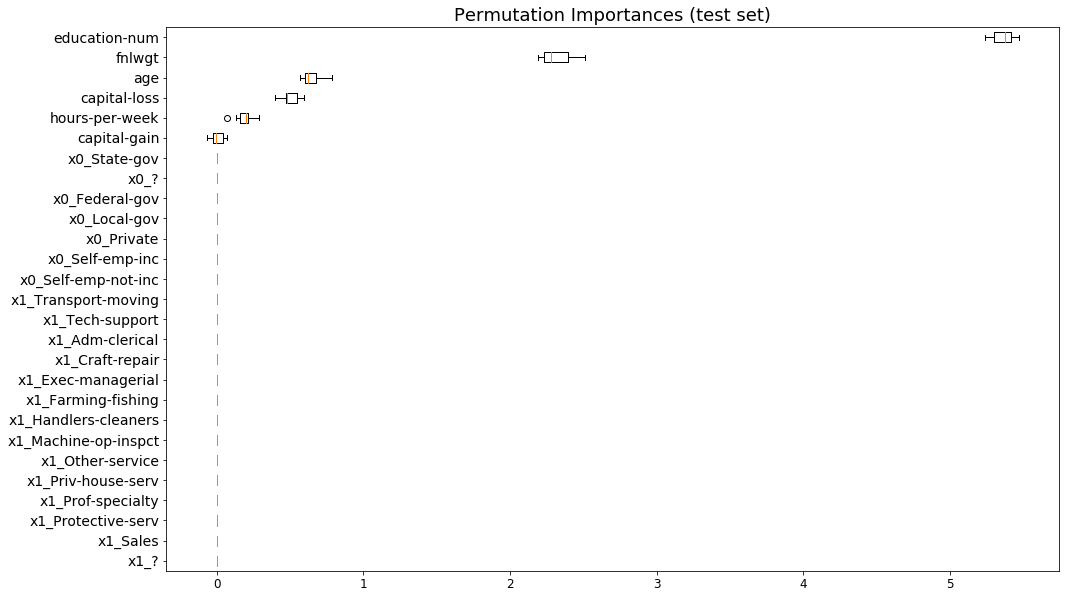

In [102]:
# Let's see box plots of the permutation importance based on 10 randomized permutations for each feature 
plt.figure(figsize=(16,10))
plt.boxplot(perm_imp.importances[perm_imp_sorted_idx].T, labels=feature_names[perm_imp_sorted_idx], vert=False)
plt.yticks(fontsize=14)
plt.title("Permutation Importances (test set)", fontsize=18)
plt.show()

## Confusion Matrix
We are going to compare the comfusion martix of the model with our custom score of mean value gained, with another version of the model that is optimized on accuracy. How do you expect the two matrices to differ from each other? 

from sklearn.metrics import plot_confusion_matrix
import matplotlib as mpl

disp = plot_confusion_matrix(xgb, X_test_prepared, y_test_prepared, values_format='.2%', cmap=plt.cm.Blues,
                             labels=[1, 0], display_labels=['>$50k', '<$50k'], normalize='true')
disp.figure_.suptitle("Confusion Matrix - Model Optimized on Mean Value Gained")
disp.figure_.set_size_inches(10, 6)
mpl.rcParams.update({'font.size': 12})

plt.show()

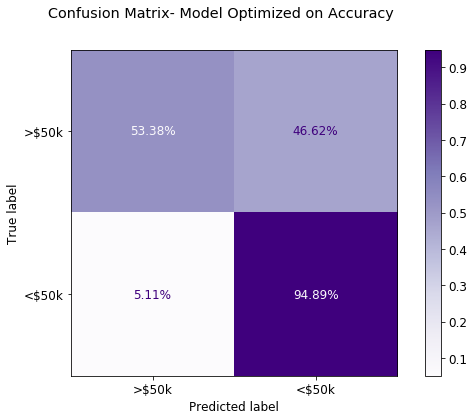

In [104]:
disp_accur = plot_confusion_matrix(grid_xgb_accur, X_test_prepared, y_test_prepared, values_format='.2%', cmap=plt.cm.Purples,
                             labels=[1, 0], display_labels=['>$50k', '<$50k'], normalize='true')
disp_accur.figure_.suptitle("Confusion Matrix- Model Optimized on Accuracy")
disp_accur.figure_.set_size_inches(10, 6)
mpl.rcParams.update({'font.size': 12})

plt.show()